# Using iris flower dataset from sklearn library to form clusters of flowers using petal length and width

In [37]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [38]:
#load the iris data
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [39]:
#check the number of rows and columns
df.shape

(150, 4)

In [40]:
#check for the null values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


# Finding the optimum number of clusters for K-Means classification

[681.3706, 152.34795176035792, 78.85144142614601, 57.25600931571815, 46.44618205128205, 39.03998724608725, 34.299712121212124, 30.014398496240602, 28.036906353450473, 26.53452922077922]


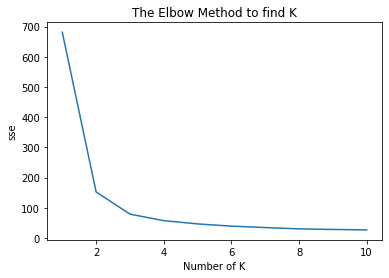

In [42]:
from sklearn.cluster import KMeans
sse = []
for i in range(1,11):
    km = KMeans(n_clusters=i, init = 'k-means++', max_iter = 30, n_init = 10, random_state=0)
    km.fit(df)
    sse.append(km.inertia_)
    
print(sse)

#plotting the results onto a line graph,
#allowing us to observe 'The Elbow'
plt.plot(range(1,11),sse)
plt.xlabel('Number of K')
plt.ylabel('sse')
plt.title('The Elbow Method to find K')
plt.show()

In [43]:
#drop the columns which are not required
df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns',inplace=True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


# Applying Kmeans to the Dataset

In [44]:
#creating the kmeans classifier
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_pred = km.fit_predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [45]:
df['clusters'] = y_pred
df.head()

,petal length (cm),petal width (cm),clusters
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [46]:
df.clusters.unique()

array([0, 2, 1])

In [47]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]

# Visualising the Clusters

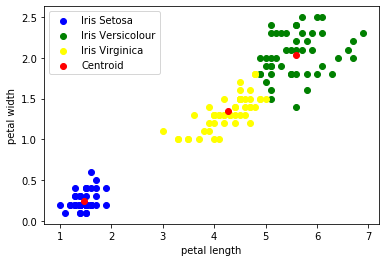

In [48]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'blue', label='Iris Setosa')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color = 'green', label='Iris Versicolour')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color = 'yellow', label='Iris Virginica')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1],color='red', label='Centroid')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()